In [4]:
# Enable interactive plot
%matplotlib notebook
color = ['#83b692','#f9ada0', '#f9627d', '#c65b7c', '#5b3758']

# To latex plots:
from matplotlib import rc

rc('text', usetex=True)
rc('font',**{'family':'serif','serif':['Palatino']})

<IPython.core.display.Javascript object>


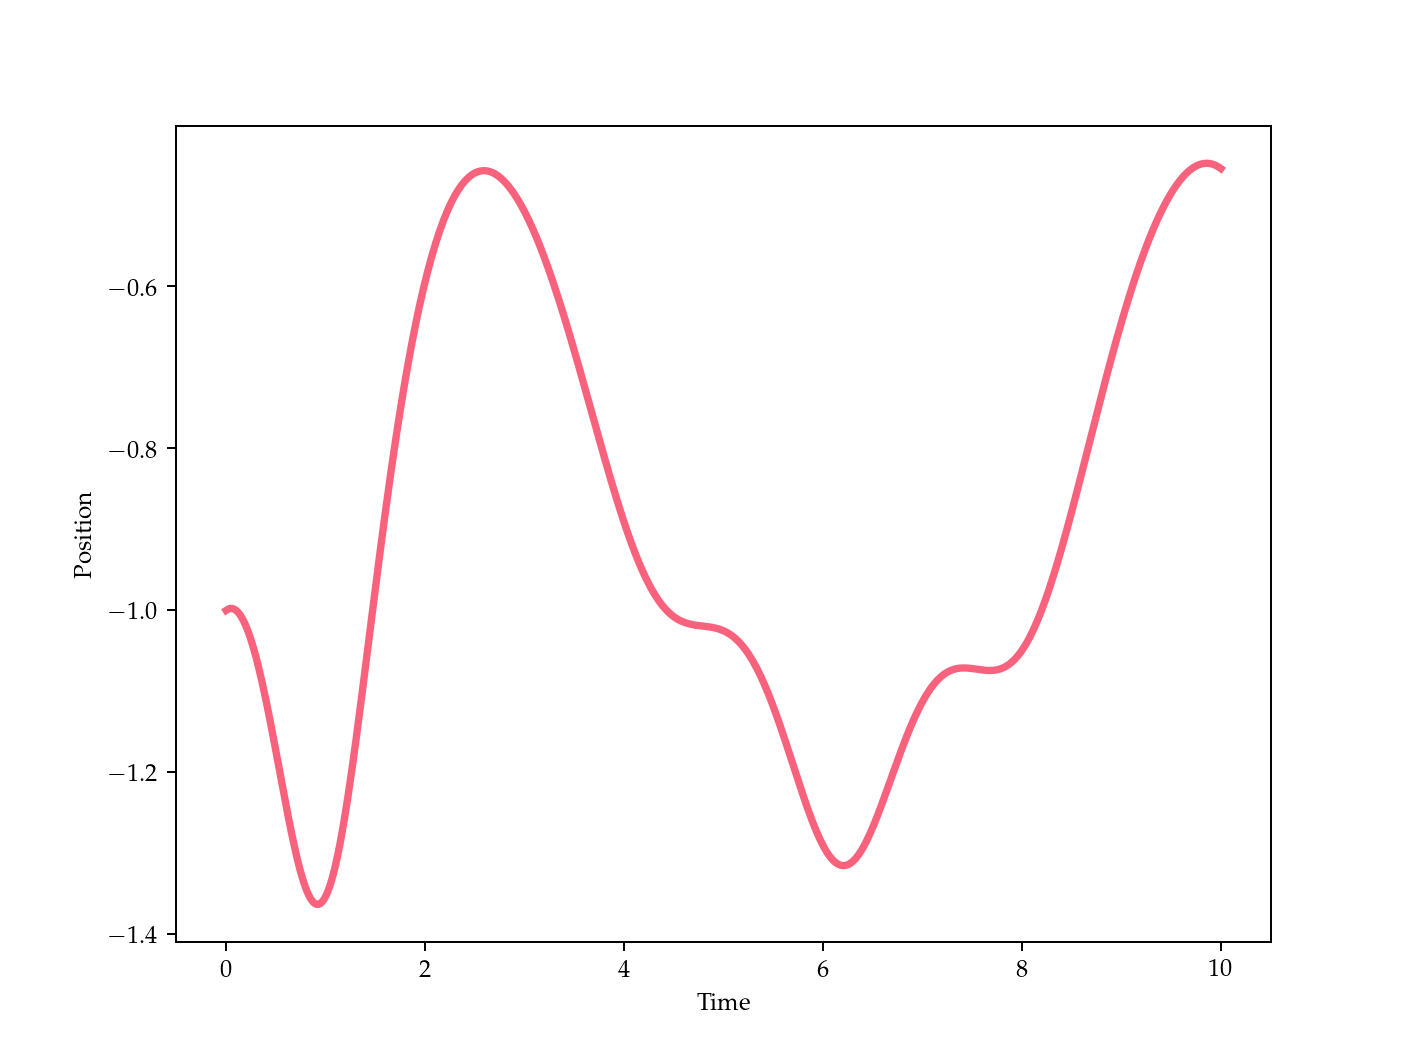

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants (adjust these to match your system)
a = 1.0  # Controls steepness of the well
b0 = 2.0  # Base well depth
b1 = 1.0  # Oscillation amplitude
omega = 1.0  # Frequency of oscillation
m = 1.0  # Mass of the proton

# Define the time-dependent potential and its derivative
def V(x, t):
    b_t = b0 + b1 * np.cos(omega * t)  # Time-dependent well depth
    return a * x**4 - b_t * x**2

def dVdx(x, t):
    b_t = b0 + b1 * np.cos(omega * t)
    return 4 * a * x**3 - 2 * b_t * x

# Define Hamilton's equations
def equations(t, y):
    x, p = y
    dxdt = p / m  # Velocity
    dpdt = -dVdx(x, t)  # Time-dependent force
    return [dxdt, dpdt]

# Time range
t_span = (0, 10)  # Time from 0 to 10 (arbitrary units)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Initial conditions (proton starts in one well with small velocity)
x0 = -1.0  # Start in left well
p0 = 0.1  # Small initial velocity
y0 = [x0, p0]

# Solve the equations
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

# Extract results
time = sol.t
x_classical = sol.y[0]

# Plot classical trajectory
plt.figure(figsize=(8, 6))
plt.plot(time, x_classical, label='Classical Trajectory', color=color[2],linewidth=3.0)
plt.xlabel('Time')
plt.ylabel('Position')
#plt.title('Classical Proton Trajectory with Time-Dependent Potential')
#plt.legend()
plt.show()